In [42]:
# Import libraries
import pandas as pd
import geopandas as gpd
# Operations on geometries
import shapely
import numpy as np
import math
import glob 
import xarray as xr
import xarray
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm
import xgboost
import xgboost as xgb
import csv as csv
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict
import os

from utils_functions.utils_data import *

In [43]:
# Set paths
PATH = '/Users/noeliaotero/Documents/OCCR/data/'
PATH_dis = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/Observed_discharge_entsoe_powerplants/'
PATH_met ='/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/Observed_discharge_entsoe_powerplants/meteovars/'
# selected power plants
PATH_pp_met ='/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/Observed_discharge_entsoe_powerplants/meteovars_avg_finalpowerplants/'

In [44]:
l_data = readfiles(PATH_dis)

In [45]:
i_select = [1,2,3,4,5,7]

In [46]:
l_data_select = [ l_data[i] for i in i_select]

In [47]:
metvar = ['t2m','t2mmax','tp']
l_met = readfiles(PATH_met)
l_pp_met = readfiles(PATH_pp_met)

In [51]:
l_catch = mergedata(l_data, l_met, metvar)

/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [48]:
l_final_catch = mergedata(l_data_select, l_pp_met, metvar)

/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [54]:
l_catch[1].head()

,date,eic_g,name_p,ID6,ID,EZG_km2,lon,lat,eic_p,type_g,...,hp,PowerSystemResourceName,name_g,ActualGenerationOutput,InstalledGenCapacity,capacity_p,generation,t2m,t2mmax,tp
1826,1979-01-01,12W-0000000164-Z,KW Rheinfelden CH,RheRhe,2091,34524,7.799905,47.560708,12W-0000000080-7,Hydro Run-of-river and poundage,...,1262.119701,NaN,NaN,NaN,NaN,NaN,NaN,-9.586233,-3.216193,2.348145
1827,1979-01-02,12W-0000000164-Z,KW Rheinfelden CH,RheRhe,2091,34524,7.799905,47.560708,12W-0000000080-7,Hydro Run-of-river and poundage,...,865.076503,NaN,NaN,NaN,NaN,NaN,NaN,-14.474973,-8.680598,5.048911
1828,1979-01-03,12W-0000000164-Z,KW Rheinfelden CH,RheRhe,2091,34524,7.799905,47.560708,12W-0000000080-7,Hydro Run-of-river and poundage,...,672.318719,NaN,NaN,NaN,NaN,NaN,NaN,-10.432981,-6.539749,0.747975
1829,1979-01-04,12W-0000000164-Z,KW Rheinfelden CH,RheRhe,2091,34524,7.799905,47.560708,12W-0000000080-7,Hydro Run-of-river and poundage,...,605.235655,NaN,NaN,NaN,NaN,NaN,NaN,-9.147037,-5.691225,0.272365
1830,1979-01-05,12W-0000000164-Z,KW Rheinfelden CH,RheRhe,2091,34524,7.799905,47.560708,12W-0000000080-7,Hydro Run-of-river and poundage,...,591.300105,NaN,NaN,NaN,NaN,NaN,NaN,-8.581805,-4.774402,0.141101


In [7]:
# First assessment
# Visualization plot
sh_file_84 = '/DischargeDB/shapefiles/converted/ch500_trans_wgs84.shp'
dat_ch84 = gpd.read_file(PATH + sh_file_84)
df_metadata = pd.read_csv(PATH_dis + '/metadata/df_metadata.csv')
x, y = df_metadata['lon'].values, df_metadata['lat'].values

In [62]:
# save the time series
names_f = ['Goschenen','Rheinfelden','Blenio','Emosson','Electra-Massa','Leventina','Gde-Dixence','Mauvoisin','Amsteg']
names_final = ['Rheinfelden','Blenio','Emosson','Electra-Massa','Leventina','Mauvoisin']
for item in range(0,len(l_catch)):
    l_catch[item].to_csv(PATH_dis + 'mergedata/' + names_f[item] +'.csv', index = False, header=True)
for it in range(0, len(l_final_catch)):
    l_final_catch[it].to_csv(PATH_dis + 'mergedata_final/' + names_final[it] +'.csv', index = False, header=True)

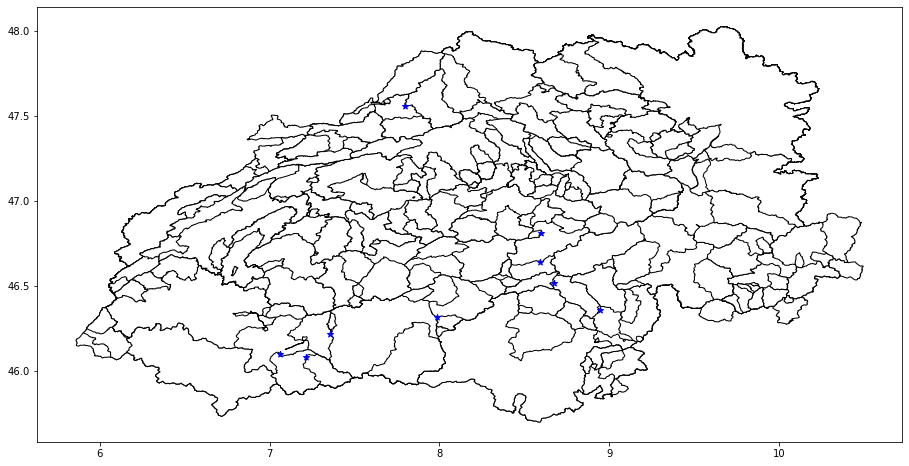

In [8]:
# visualize it
fig, ax = plt.subplots(figsize=(16,8))
dat_ch84.plot(ax=ax,color='white', edgecolor='black')
ax.set_aspect('equal')
ax.scatter(x, y, marker="*", color='b', s=40)
plt.show()

In [22]:
l_catch[0].name_p.unique()

array(['Kraftwerk Göschenen', nan], dtype=object)

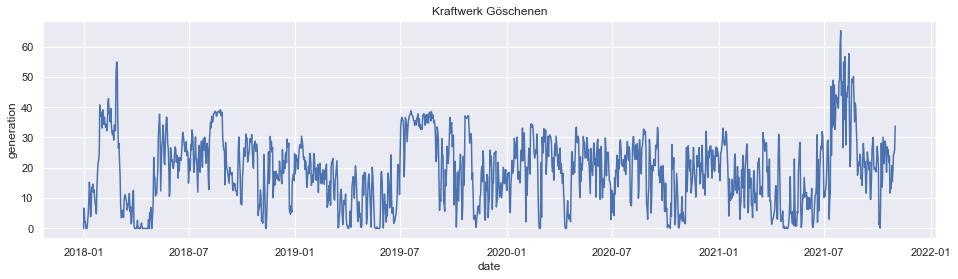

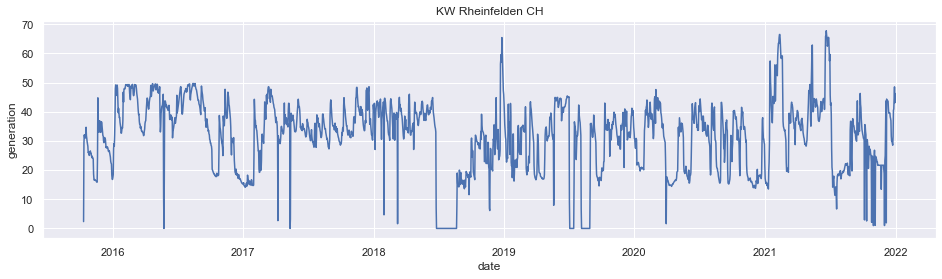

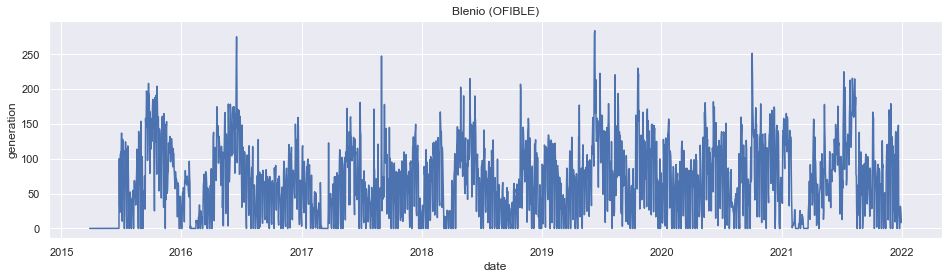

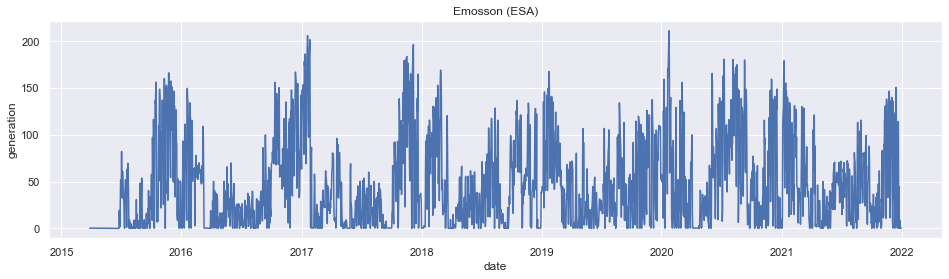

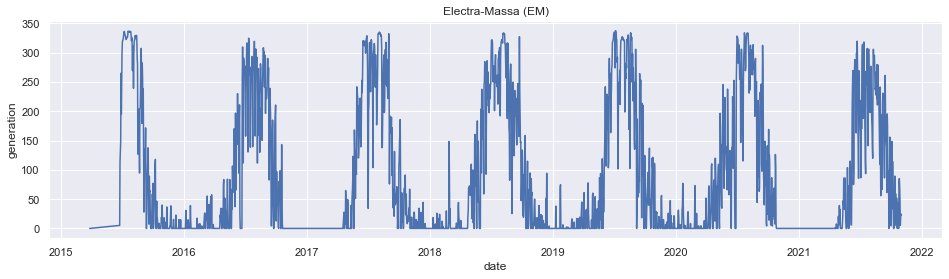

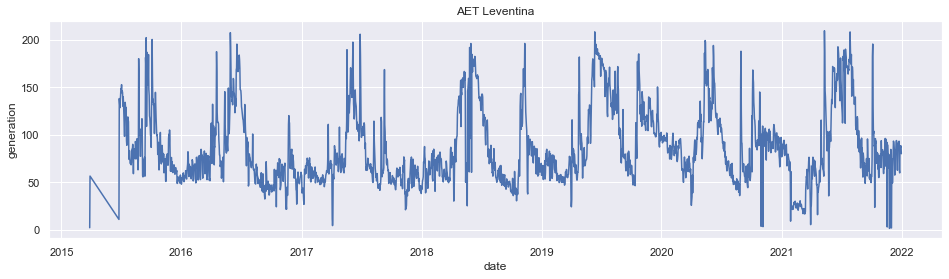

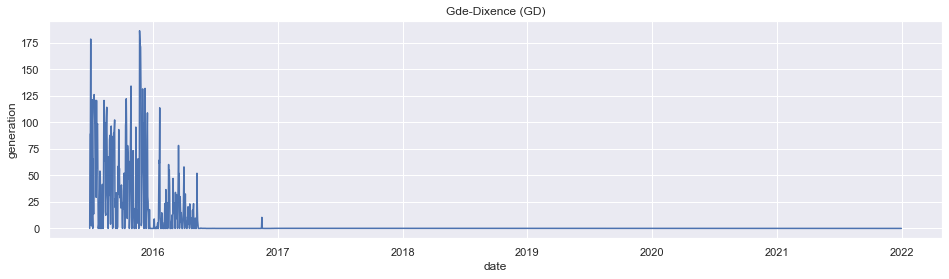

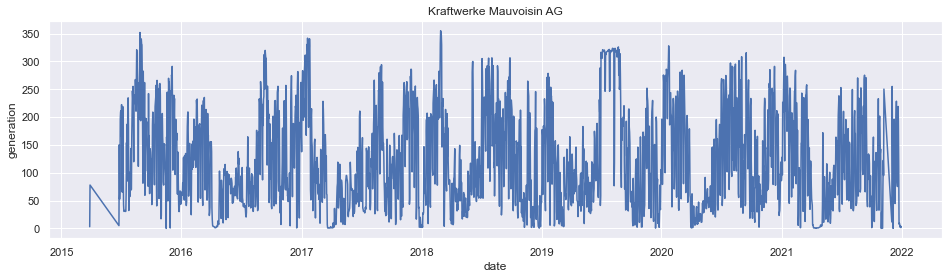

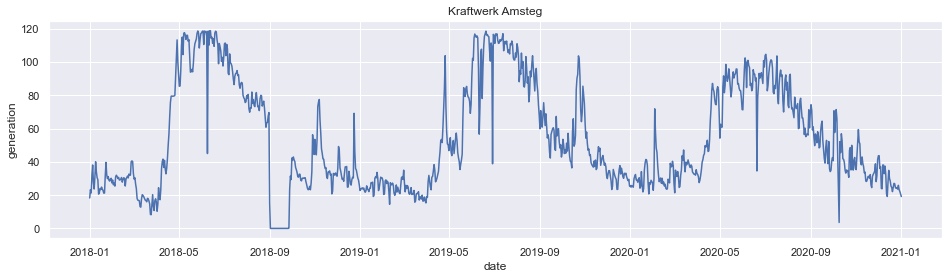

In [26]:
# Visualize time series
import seaborn as sns
from numpy import nan
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 4)})
#sns.lineplot(x='date',y='ActualGenerationOutput',data=l_catch[1]).set_title(l_catch[1].name_p.unique())
# iterate over the data
for item in range(0,len(l_catch)):

    name_s = l_catch[item].name_p.unique()
    name_s = [x for x in name_s if x is not nan]
    name_s = ''.join(name_s)
     # create a new figure and axis object  
    fig, ax = plt.subplots()
    # give this axis to seaborn so that it can plot in each iteration
    sns.lineplot(x='date',y='generation',data=l_catch[item]).set_title(name_s )